<h1>1. Import Libraries</h1>

In [88]:
import nltk
import pandas as pd
from matplotlib import pyplot

<h1>2. Data Load</h1>

In [89]:
data_frame= pd.read_csv("D:\\Training\\NLP Assignment\\learn-ai-bbc\\BBC News Train.csv")

In [90]:
data_frame.head(15)


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
5,1582,howard truanted to play snooker conservative...,politics
6,651,wales silent on grand slam talk rhys williams ...,sport
7,1797,french honour for director parker british film...,entertainment
8,2034,car giant hit by mercedes slump a slump in pro...,business
9,1866,fockers fuel festive film chart comedy meet th...,entertainment


In [91]:
target_category = data_frame['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


<h1> One Hot Encoding </h1>

In [92]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'Category' column 
encoder_data_frame = pd.DataFrame(encoder.fit_transform(data_frame[['Category']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_data_frame = data_frame.join(encoder_data_frame)

#view final df
print(final_data_frame)

      ArticleId                                               Text  \
0          1833  worldcom ex-boss launches defence lawyers defe...   
1           154  german business confidence slides german busin...   
2          1101  bbc poll indicates economic gloom citizens in ...   
3          1976  lifestyle  governs mobile choice  faster  bett...   
4           917  enron bosses in $168m payout eighteen former e...   
...         ...                                                ...   
1485        857  double eviction from big brother model caprice...   
1486        325  dj double act revamp chart show dj duo jk and ...   
1487       1590  weak dollar hits reuters revenues at media gro...   
1488       1587  apple ipod family expands market apple has exp...   
1489        538  santy worm makes unwelcome visit thousands of ...   

           Category    0    1    2    3    4  
0          business  1.0  0.0  0.0  0.0  0.0  
1          business  1.0  0.0  0.0  0.0  0.0  
2          busines

In [93]:
dummy_var = pd.get_dummies(data_frame.Category)
dummy_var

,business,entertainment,politics,sport,tech
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
1485,0,1,0,0,0
1486,0,1,0,0,0
1487,1,0,0,0,0
1488,0,0,0,0,1


In [94]:
data_frame.groupby('Category').count()

,ArticleId,Text
Category,,
business,336,336
entertainment,273,273
politics,274,274
sport,346,346
tech,261,261


<h1> Visualization </h1>

<AxesSubplot: xlabel='Category'>

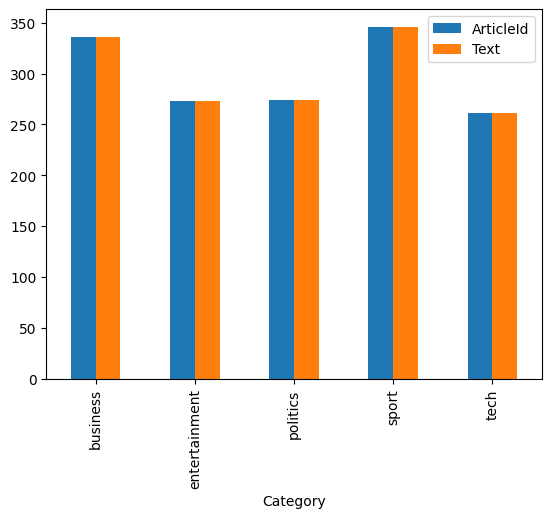

In [54]:
data_frame.groupby('Category').count().plot.bar(ylim=0)

<h1>Tokenization</h1>

To make it easier to apply tokenization to Pandas dataframe column, and to re-use the function in any other NLP project, we’ll make a little function. This takes a Pandas column name and returns a list of tokens from word_tokenize. The for loop bit uses isalpha() to return values instead of booleans.

In [95]:
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenize(Text):
    """-Tokenizes a Pandas dataframe column and returns a list of tokens.
       -Text is argument.
       -And returns tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """
    tokens = nltk.word_tokenize(Text)
    return [w for w in tokens if w.isalpha()] 

Run our function on the Pandas text column using a lambda function on the vertical axis (via axis=1). This passes in the whole text column, uses NLTK to tokenize the values, and returns a new Pandas column called tokenized that contains Python lists containing comma separated tokens.

In [96]:
data_frame['tokenized'] = data_frame.apply(lambda x: tokenize(x['Text']), axis=1)
data_frame[['tokenized']].head(15)

,tokenized
0,"[worldcom, launches, defence, lawyers, defendi..."
1,"[german, business, confidence, slides, german,..."
2,"[bbc, poll, indicates, economic, gloom, citize..."
3,"[lifestyle, governs, mobile, choice, faster, b..."
4,"[enron, bosses, in, payout, eighteen, former, ..."
5,"[howard, truanted, to, play, snooker, conserva..."
6,"[wales, silent, on, grand, slam, talk, rhys, w..."
7,"[french, honour, for, director, parker, britis..."
8,"[car, giant, hit, by, mercedes, slump, a, slum..."
9,"[fockers, fuel, festive, film, chart, comedy, ..."


<h1>StopWords</h1>

In [337]:
from nltk.corpus import stopwords
stopwords = (stopwords.words('english'))

In [98]:
data_frame['without_stopwords'] = data_frame['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [99]:
print(len(data_frame['without_stopwords'][0]))

1455


In [60]:
print(data_frame['without_stopwords'])

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens maj...
3       lifestyle governs mobile choice faster better ...
4       enron bosses $168m payout eighteen former enro...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hits reuters revenues media group ...
1488    apple ipod family expands market apple expande...
1489    santy worm makes unwelcome visit thousands web...
Name: without_stopwords, Length: 1490, dtype: object


<h1>Stemming</h1>

In [100]:
from nltk.stem import PorterStemmer

ps = PorterStemmer() #Algorithm for stemming

In [101]:
data_frame['porter_stemmed'] = data_frame['without_stopwords'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [102]:
print(data_frame['porter_stemmed'][0])

worldcom ex-boss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first witness. cynthia cooper worldcom ex-head intern account alert director irregular account practic us telecom giant 2002. warn led collaps firm follow discoveri $11bn (£5.7bn) account fraud. mr ebber plead guilti charg fraud conspiracy. prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estimates. ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002. said andersen given green light procedur practic use worldcom. mr ebber lawyer said unawar fraud argu auditor alert problems. ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer himself. prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book . ho

<h1>Lemmetization</h1>

In [103]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [104]:
data_frame['lemmatized'] = data_frame['porter_stemmed'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [105]:
print(data_frame['lemmatized'][0])

worldcom ex-boss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first witness. cynthia cooper worldcom ex-head intern account alert director irregular account practic u telecom giant 2002. warn led collaps firm follow discoveri $11bn (£5.7bn) account fraud. mr ebber plead guilti charg fraud conspiracy. prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estimates. m cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002. said andersen given green light procedur practic use worldcom. mr ebber lawyer said unawar fraud argu auditor alert problems. m cooper also said sharehold meet mr ebber often pas technic question compani financ chief give brief answer himself. prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book . howev 

In [106]:
merge= pd.concat([data_frame, dummy_var], axis='columns')
merge

,ArticleId,Text,Category,tokenized,without_stopwords,porter_stemmed,lemmatized,business,entertainment,politics,sport,tech
0,1833,worldcom ex-boss launches defence lawyers defe...,business,"[worldcom, launches, defence, lawyers, defendi...",worldcom ex-boss launches defence lawyers defe...,worldcom ex-boss launch defenc lawyer defend f...,worldcom ex-boss launch defenc lawyer defend f...,1,0,0,0,0
1,154,german business confidence slides german busin...,business,"[german, business, confidence, slides, german,...",german business confidence slides german busin...,german busi confid slide german busi confid fe...,german busi confid slide german busi confid fe...,1,0,0,0,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,"[bbc, poll, indicates, economic, gloom, citize...",bbc poll indicates economic gloom citizens maj...,bbc poll indic econom gloom citizen major nati...,bbc poll indic econom gloom citizen major nati...,1,0,0,0,0
3,1976,lifestyle governs mobile choice faster bett...,tech,"[lifestyle, governs, mobile, choice, faster, b...",lifestyle governs mobile choice faster better ...,lifestyl govern mobil choic faster better funk...,lifestyl govern mobil choic faster better funk...,0,0,0,0,1
4,917,enron bosses in $168m payout eighteen former e...,business,"[enron, bosses, in, payout, eighteen, former, ...",enron bosses $168m payout eighteen former enro...,enron boss $168m payout eighteen former enron ...,enron bos $168m payout eighteen former enron d...,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,"[double, eviction, from, big, brother, model, ...",double eviction big brother model caprice holb...,doubl evict big brother model capric holbi cit...,doubl evict big brother model capric holbi cit...,0,1,0,0,0
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,"[dj, double, act, revamp, chart, show, dj, duo...",dj double act revamp chart show dj duo jk joel...,dj doubl act revamp chart show dj duo jk joel ...,dj doubl act revamp chart show dj duo jk joel ...,0,1,0,0,0
1487,1590,weak dollar hits reuters revenues at media gro...,business,"[weak, dollar, hits, reuters, revenues, at, me...",weak dollar hits reuters revenues media group ...,weak dollar hit reuter revenu media group reut...,weak dollar hit reuter revenu medium group reu...,1,0,0,0,0
1488,1587,apple ipod family expands market apple has exp...,tech,"[apple, ipod, family, expands, market, apple, ...",apple ipod family expands market apple expande...,appl ipod famili expand market appl expand ipo...,appl ipod famili expand market appl expand ipo...,0,0,0,0,1


<h1>Naive Bayes</h1>

In [352]:
import numpy as np
import pandas as pd


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [130]:

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ArticleId          1490 non-null   int64 
 1   Text               1490 non-null   object
 2   Category           1490 non-null   object
 3   tokenized          1490 non-null   object
 4   without_stopwords  1490 non-null   object
 5   porter_stemmed     1490 non-null   object
 6   lemmatized         1490 non-null   object
dtypes: int64(1), object(6)
memory usage: 81.6+ KB


In [289]:
X = data_frame.Text
y = data_frame.Category

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.8, random_state=1)

<h1> Tf-Idf </h1>

In [290]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer()

# tokenize and build vocab
vectorizer.fit(X_train)
print(vectorizer.vocabulary_)
X_transformed = vectorizer.transform(X_train)
X_transformed.toarray()

#for test data

X_test_transformed = vectorizer.transform(X_test)
print(X_test_transformed.toarray())

# print(vectorizer.idf_)

{'have': 9740, 'hackers': 9527, 'recruited': 16558, 'your': 22391, 'pc': 14897, 'more': 13461, 'than': 20226, 'one': 14299, 'million': 13227, 'computers': 4915, 'on': 14295, 'the': 20241, 'net': 13836, 'been': 2767, 'hijacked': 9966, 'to': 20454, 'attack': 2254, 'websites': 21881, 'and': 1776, 'pump': 16050, 'out': 14470, 'spam': 18910, 'viruses': 21602, 'huge': 10233, 'number': 14099, 'was': 21795, 'revealed': 17117, 'by': 3734, 'security': 17992, 'researchers': 16964, 'who': 22007, 'spent': 18995, 'months': 13444, 'tracking': 20607, '100': 45, 'networks': 13852, 'of': 14206, 'remotely': 16839, 'controlled': 5213, 'machines': 12493, 'largest': 11844, 'network': 13849, 'so': 18754, 'called': 3787, 'zombie': 22454, 'spied': 19004, 'team': 20064, 'made': 12515, 'up': 21273, '50': 717, '000': 1, 'home': 10077, 'data': 5809, 'gathered': 8925, 'using': 21351, 'that': 20235, 'looked': 12342, 'innocent': 10773, 'but': 3708, 'which': 21979, 'logged': 12311, 'everything': 7654, 'did': 6331, 'th

In [316]:
X_transformed.todense()


matrix([[0.        , 0.01746715, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.02383187, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.01837441, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [320]:
NB_model=MultinomialNB()
NB_model.fit(X_transformed, y_train)


MultinomialNB()

In [321]:
#predict class
y_predict = NB_model.predict(X_test_transformed)
#predict probabilities
y_pred_probability= NB_model.predict_proba(X_test_transformed)

In [324]:
#printing the overall accuracy

metrics.accuracy_score(y_test, y_predict)

0.9496644295302014

In [325]:
#confusion matrix

metrics.confusion_matrix(y_test, y_predict)

array([[67,  0,  0,  0,  1],
       [ 1, 44,  4,  4,  2],
       [ 1,  0, 52,  0,  0],
       [ 0,  0,  0, 67,  0],
       [ 1,  0,  0,  1, 53]], dtype=int64)

<h1> Classification </h1>

In [327]:
print(classification_report(y_test, y_predict))

               precision    recall  f1-score   support

     business       0.96      0.99      0.97        68
entertainment       1.00      0.80      0.89        55
     politics       0.93      0.98      0.95        53
        sport       0.93      1.00      0.96        67
         tech       0.95      0.96      0.95        55

     accuracy                           0.95       298
    macro avg       0.95      0.95      0.95       298
 weighted avg       0.95      0.95      0.95       298



<h1> Logistic Regression </h1>

In [341]:
Logis_reg = LogisticRegression()
Logis_reg.fit(X_transformed, y_train)

LogisticRegression()

In [342]:
y_predicted = Logis_reg.predict(X_test_transformed)

In [343]:
y_pred_probability = Logis_reg.predict_proba(X_test_transformed)

In [344]:
metrics.accuracy_score(y_test, y_predict)

0.9496644295302014

In [345]:
metrics.confusion_matrix(y_test, y_predict)

array([[67,  0,  0,  0,  1],
       [ 1, 44,  4,  4,  2],
       [ 1,  0, 52,  0,  0],
       [ 0,  0,  0, 67,  0],
       [ 1,  0,  0,  1, 53]], dtype=int64)

<h1> Classification </h1>

In [346]:
print(classification_report(y_test, y_predict))

               precision    recall  f1-score   support

     business       0.96      0.99      0.97        68
entertainment       1.00      0.80      0.89        55
     politics       0.93      0.98      0.95        53
        sport       0.93      1.00      0.96        67
         tech       0.95      0.96      0.95        55

     accuracy                           0.95       298
    macro avg       0.95      0.95      0.95       298
 weighted avg       0.95      0.95      0.95       298



In [438]:
# # create function to predict text
# labels = ['Business','Entertainment','Politics','Sports','Tech']

# def predictText(text):
#   texts = data_frame['Text'] 
#   tokenizer = Tokenizer()
#   tokenizer.fit_on_texts(texts)
#   seq = tokenizer.texts_to_sequences(texts) 
#   max_length = 22466
#   padded = pad_sequences(seq, maxlen=max_length)
#   pred = NB_model.predict(padded)
#   df = pd.DataFrame({'Category' : labels, 'percentage' : pred[0]})
#   print(df)
#   print('\nThe text is classified as', labels[np.argmax(pred)], 'Category')

In [440]:
# news = ['worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (Â£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebber s lawyers have said he was unaware of the fraud  arguing that auditors did not alert him to any problems.  ms cooper also said that during shareholder meetings mr ebbers often passed over technical questions to the company s finance chief  giving only  brief  answers himself. the prosecution s star witness  former worldcom financial chief scott sullivan  has said that mr ebbers ordered accounting adjustments at the firm  telling him to  hit our books . however  ms cooper said mr sullivan had not mentioned  anything uncomfortable  about worldcom s accounting during a 2001 audit committee meeting. mr ebbers could face a jail sentence of 85 years if convicted of all the charges he is facing. worldcom emerged from bankruptcy protection in 2004  and is now known as mci. last week  mci agreed to a buyout by verizon communications in a deal valued at $6.75bn.']
# predictText(news)

<h1> Saving and Loading </h1>

In [441]:
#pickle model allows you to serialize python object into file
import pickle

In [443]:
with open('model_pickle', 'wb') as f:
    pickle.dump(Logis_reg,f)

In [444]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [448]:
import joblib

In [449]:
joblib.dump(NB_model, 'model_jblib')

['model_jblib']

In [450]:
mj = joblib.load('model_jblib')